In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Setting the random seed
# Feel free to change it to see different solutions
np.random.seed(42)

def step_function(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return step_function((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
def perceptron_step(X, y, W, b, learn_rate = 0.01):
    """
    Inputs:
        array of point (X)
        array of labels for those points (y)
        array of weights (W)
        bias b
    
    This function will take an array of points, and if any of them are misclassified it will adjust the weights and bias EXACTLY ONCE. 
    It will return the adjusted weights and bias.

    Psuedocode:
        1) Look at every point. 
        2) For every misclassifed point:
            if point is positive in a negative area (if prediction = 0)
                For i = 1...n
                    Change wi to wi + LR(xi)
                    change bias to bias + LR
            if point is negative in a positive area (if prediction = 1)
                For i = 1...n
                    Change wi to wi - LR(xi)
                    change bias to bias - LR

    """

    # loop through the range of 0 to length of X
    for i in range(len(X)):

        # get the prediction of where the point should be based on the line
        y_hat = prediction(X[i], W, b)
        
        # check to see if prediction matches label
        # results either be a match (1,1), (0,0) or not a match (1,0), (0,1)
        
        # positive point misclassified in negative area - add the point
        if y[i]-y_hat == 1:
            
            #print('Positive point in negative prediction for: ', X[i])
            W[0] = W[0] + (learn_rate * X[i][0])
            W[1] = W[1] + (learn_rate * X[i][1])
            b = b + learn_rate

        # negative point misclassified in positive area - subtract the point
        elif y[i]-y_hat == -1:   
            
            #print('Negative point in positive prediction for: ', X[i])
            W[0] = W[0] - (learn_rate * X[i][0])
            W[1] = W[1] - (learn_rate * X[i][1])
            b = b - learn_rate

    return W, b

In [65]:
# Testing your algorithm code

X_test = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
y_test = np.array([1,1,0,0])
W_test = np.array([[0.5], [0.5]])
b_test = 0.5

output_W, output_b = perceptron_step(
    X_test,
    y_test,
    W_test,
    b_test,
    0.01
)
solution_W = np.array([[ 0.51],[ 0.49]])
solution_b = 0.49
if np.array_equal(output_W, solution_W) and output_b == solution_b:
    print("Nice work coding the perceptron algorithm!")
else:
    print("Try again. For perceptron_step(\n{}, \n{}, \n{}, \n{}, \
\n{}\n)\nthe expected result was \nW=\n{}\nand b={}, but your output \
was \nW=\n{}\nand b={}".format(
        X_test,
        y_test,
        W_test,
        b_test,
        0.01,
        solution_W,
        solution_b,
        output_W,
        output_b
    ))

Nice work coding the perceptron algorithm!


## cell below will repeatedly run your perceptron_step function and plot the solution below ##


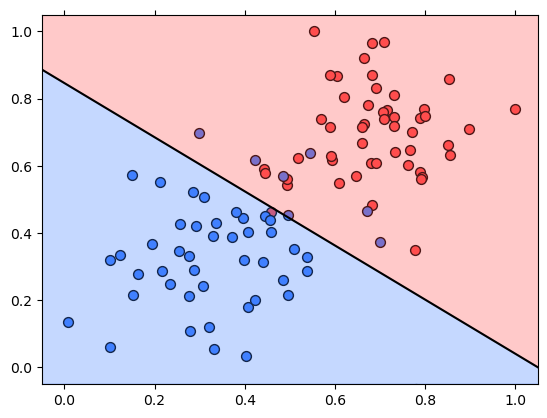

: 

In [ ]:
def train_perceptron_algorithm(X, y, learn_rate=0.01, num_epochs=1000):
    """
    Inputs:
        array of point (X)
        array of labels for those points (y)
        learning rate set to .01
        number of epochs = 25

    This function runs the perceptron algorithm num_epochs times on the dataset of points
    It returns a few of the boundary lines obtained in the iterations, for plotting purposes.
    """

    # find the min and max of both the point coordinates and the labels
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    # print(f'x_min: {x_min} x_max: {x_max}')

    # generate a random array of 2 weights
    W = np.array(np.random.rand(2,1))
    #print(W)

    # generate a random bias
    b = np.random.rand(1)[0] + x_max

    # These are the solution lines that get plotted below.
    boundary_lines = []

    # call the perceptron_step num_epoch times
    for i in range(num_epochs):

        # In each epoch, we apply the perceptron step. Notice that the input is the output of the previous run - hence it's learning
        W, b = perceptron_step(X, y, W, b, learn_rate)

        # capture the lines that are returned
        #print(f'-W[0]/W[1]: {-W[0]/W[1]:}, -b/W[1]: {-b/W[1]:}')
        boundary_lines.append((-W[0]/W[1], -b/W[1]))

    return boundary_lines

def plot_line(m, b, linestyle='dashed', color='gray', fill=False):
    """
    Helper function to avoid repetitive code when plotting boundary lines
    """
    x = np.arange(-10.0, 10.0, 0.1)
    plt.plot(x, m*x+b, linestyle=linestyle, color=color)
    if fill:
        plt.fill_between(x, m*x+b, -0.05, color=blue, alpha=0.3)
        plt.fill_between(x, m*x+b, 1.05, color=red, alpha=0.3)

# Load data into a 2D array
data = np.asarray(pd.read_csv("data.csv", header=None))

# [row, col] slice data so that it's an array of all rows and just the first two columns
X = data[:,0:2]
# print(X)

# [row, col] slice data so that it's an array of all rows of column 2
y = data[:,2]
# print(y)

# Provide the array of points with labels, and return a list of boundary lines
# Feel free to play with the learning rate and the num_epochs, and see your results plotted below
boundary_lines = train_perceptron_algorithm(X, y)

# Set up plot styling
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')

# define the colors
red = [1,0.3,0.3]
blue = [0.25,0.5,1]

# color the points based on the label
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]

# plot the points
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

# Plot boundary lines and solution regions
for line in boundary_lines:

    # w1(x1) + w2(x2) + b = 0 ---> y = mx + c
    # m is rise over run (-W[0]/W[1]). 
    slope = line[0]

    # c is where line crosses y axis (-b/W[1])
    b = line[1]

    # plot every line on the graph
    #plot_line(slope, b)
    #print(f'slope: {slope}')

# this is the final slope that was determined
solution_slope = boundary_lines[-1][0]
# print(solution_slope)

#this was the final y intercept
solution_intercept = boundary_lines[-1][1]

# plot a solid line for the solution and fill in the graph with color. 
# 'k' = black. 'True' means fill area between line and specified boundaries
plot_line(solution_slope, solution_intercept, 'solid', 'k', True)

plt.show()